#  Analyse en composantes principales

Dans ce notebook, nous explorons ce qui est peut-être l'un des algorithmes non supervisés les plus largement utilisés, l'analyse en composantes principales (ACP).
L'ACP est fondamentalement un algorithme de réduction de la dimensionnalité, mais il peut également être utile comme outil de visualisation, de filtrage du bruit, d'extraction et du feature engineering, et bien plus encore.
Après une brève discussion conceptuelle de l'algorithme PCA, nous allons voir quelques exemples de ces autres applications.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Introduction à l'analyse en composantes principales

L'analyse en composantes principales est une méthode non supervisée rapide et flexible de réduction de la dimensionnalité des données.
Son comportement est plus facile à visualiser en examinant un ensemble de données à deux dimensions.
Considérons les 200 points suivants :

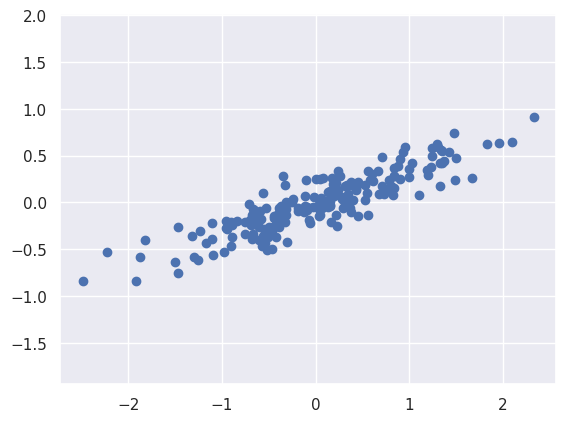

In [2]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

A l'œil, il est clair qu'il existe une relation quasi linéaire entre les variables x et y.
Cela rappelle les données de régression linéaire, mais le problème est ici légèrement différent : plutôt que d'essayer de *prédire* les valeurs y à partir des valeurs x, le problème d'apprentissage non supervisé tente d'apprendre la *relation* entre les valeurs x et y.

Dans l'analyse en composantes principales, cette relation est quantifiée en trouvant une liste des *axes principaux* dans les données, et en utilisant ces axes pour décrire l'ensemble de données.
En utilisant l'estimateur ``PCA`` de Scikit-Learn, nous pouvons calculer cela comme suit :

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

L'ajustement apprend certaines quantités à partir des données, principalement les "composantes" et la "variance expliquée" :

In [4]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [5]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


Pour comprendre la signification de ces chiffres, visualisons-les sous forme de vecteurs sur les données d'entrée, en utilisant les "composantes" pour définir la direction du vecteur, et la "variance expliquée" pour définir la longueur au carré du vecteur :

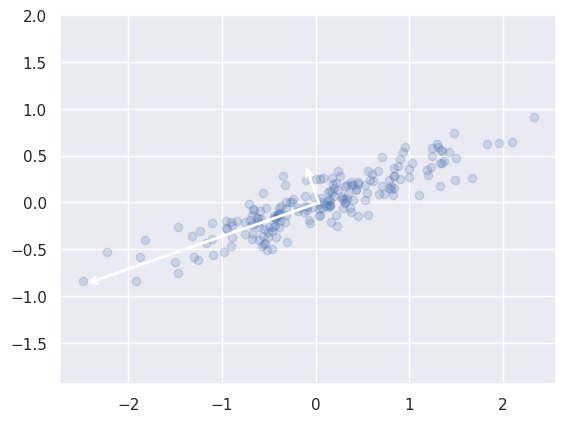

In [6]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

Ces vecteurs représentent les *axes principaux* des données, et la longueur du vecteur est une indication de l'"importance" de cet axe dans la description de la distribution des données - plus précisément, c'est une mesure de la variance des données lorsqu'elles sont projetées sur cet axe.
La projection de chaque point de données sur les axes principaux constitue les "composantes principales" des données.

Si nous traçons ces composantes principales à côté des données originales, nous obtenons les graphiques illustrés ici :

Cette transformation des axes de données en axes principaux est une *transformation affine*, ce qui signifie essentiellement qu'elle est composée d'une translation, d'une rotation et d'une mise à l'échelle uniforme.

Si cet algorithme de recherche des composantes principales peut sembler n'être qu'une curiosité mathématique, il s'avère avoir des applications très poussées dans le monde de l'apprentissage automatique et de l'exploration des données.

### L'ACP comme réduction de la dimensionnalité

L'utilisation de l'ACP pour la réduction de la dimensionnalité implique la mise à zéro d'une ou plusieurs des plus petites composantes principales, ce qui donne lieu à une projection de dimension inférieure des données qui préserve la variance maximale des données.

Voici un exemple d'utilisation de l'ACP comme transformée de réduction de la dimensionnalité :

In [7]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


Les données transformées ont été réduites à une seule dimension.
Pour comprendre l'effet de cette réduction de dimensionnalité, nous pouvons effectuer la transformation inverse de ces données réduites et les tracer avec les données d'origine :

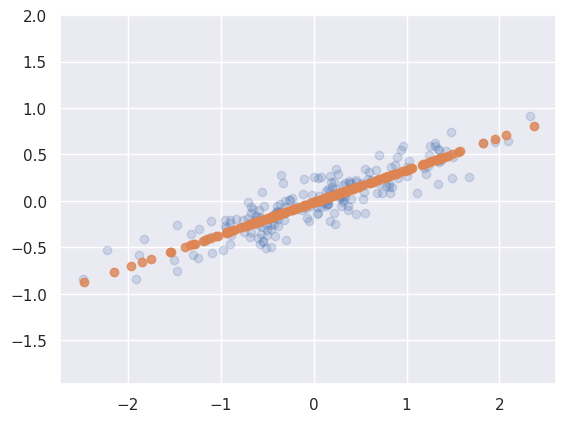

In [8]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

Les points clairs représentent les données originales, tandis que les points foncés représentent la version projetée.
Cela montre clairement ce que signifie une réduction de la dimensionnalité de l'ACP : les informations le long du ou des axes principaux les moins importants sont supprimées, ne laissant que la ou les composantes des données ayant la plus grande variance.
La fraction de la variance qui est supprimée (proportionnelle à l'écart des points autour de la ligne formée dans cette figure) est une mesure approximative de la quantité d'"informations" rejetées dans cette réduction de la dimensionnalité.

Cet ensemble de données à dimension réduite est, dans un certain sens, "suffisamment bon" pour encoder les relations les plus importantes entre les points : malgré une réduction de la dimension des données de 50%, la relation globale entre les points de données est en grande partie préservée.

### ACP pour la visualisation : Chiffres écrits à la main

L'utilité de la réduction de la dimensionnalité n'est peut-être pas tout à fait apparente en deux dimensions seulement, mais elle devient beaucoup plus claire lorsqu'on examine des données à haute dimension.
Pour s'en convaincre, examinons rapidement l'application de l'ACP aux données de chiffres que nous avons vues auparavant
Nous commençons par charger les données :

In [9]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

Rappelons que les données sont constituées d'images de 8×8 pixels, ce qui signifie qu'elles sont à 64 dimensions.
Pour avoir une idée des relations entre ces points, nous pouvons utiliser l'ACP pour les projeter dans un nombre de dimensions plus facile à gérer, disons deux :

In [10]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


<ipython-input-11-504ece1e58b7>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('nipy_spectral', 10))


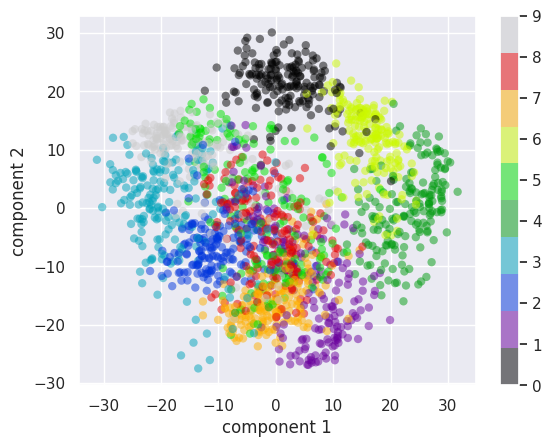

In [11]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

Rappelons la signification de ces composantes : les données complètes sont un nuage de points à 64 dimensions, et ces points sont la projection de chaque point de données le long des directions présentant la plus grande variance.
Essentiellement, nous avons trouvé l'étirement et la rotation optimaux dans l'espace à 64 dimensions qui nous permettent de voir la disposition des chiffres en deux dimensions, et nous l'avons fait de manière non supervisée, c'est-à-dire sans référence aux étiquettes.

### Que signifient les composants ?

Nous pouvons aller un peu plus loin ici, et commencer à nous demander ce que les dimensions réduites *signifient*.
Cette signification peut être comprise en termes de combinaisons de vecteurs de base.
Par exemple, chaque image de l'ensemble d'apprentissage est définie par une collection de 64 valeurs de pixels, que nous appellerons le vecteur $x$ :

$$
x = [x_1, x_2, x_3 \cdots x_{64}]
$$

On peut y penser en termes de base de pixels.
Autrement dit, pour construire l'image, nous multiplions chaque élément du vecteur par le pixel qu'il décrit, puis nous additionnons les résultats pour construire l'image :

$$
{\rm image}(x) = x_1 \cdot{\rm (pixel~1)} + x_2 \cdot{\rm (pixel~2)} + x_3 \cdot{\rm (pixel~3)} \cdots x_{64} \cdot{\rm (pixel~64)}
$$

Une façon de réduire la dimension de ces données est de mettre à zéro tous ces vecteurs de base, sauf quelques-uns.
Par exemple, si nous n'utilisons que les huit premiers pixels, nous obtenons une projection à huit dimensions des données, mais elle ne reflète pas vraiment l'ensemble de l'image : nous avons éliminé près de 90 % des pixels !

![](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.09-digits-pixel-components.png?raw=1)

La rangée supérieure des panneaux montre les pixels individuels, et la rangée inférieure montre la contribution cumulative de ces pixels à la construction de l'image.
En utilisant seulement huit des composants de la base des pixels, nous ne pouvons construire qu'une petite partie de l'image de 64 pixels.
Si nous continuions cette séquence et utilisions les 64 pixels, nous retrouverions l'image originale.

Mais la représentation par pixel n'est pas le seul choix de base. Nous pouvons également utiliser d'autres fonctions de base, qui contiennent chacune une contribution prédéfinie de chaque pixel, et écrire quelque chose comme

$$
image(x) = {\rm mean} + x_1 \cdot{\rm (base~1)} + x_2 \cdot{\rm (base~2)} + x_3 \cdot{\rm (base~3)} \cdots
$$

L'ACP peut être considérée comme un processus consistant à choisir des fonctions de base optimales, de sorte que l'addition des premières d'entre elles suffise à reconstruire correctement la majeure partie des éléments de l'ensemble de données.
Les composantes principales, qui agissent comme la représentation à faible dimension de nos données, sont simplement les coefficients qui multiplient chacun des éléments de cette série.
Cette figure montre une représentation similaire de la reconstruction de ce chiffre en utilisant la moyenne plus les huit premières fonctions de base de l'ACP :

![](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.09-digits-pca-components.png?raw=1)

Contrairement à la base pixel, la base PCA nous permet de récupérer les caractéristiques saillantes de l'image d'entrée avec seulement une moyenne plus huit composantes !
La quantité de chaque pixel dans chaque composante est le corollaire de l'orientation du vecteur dans notre exemple bidimensionnel.
C'est dans ce sens que l'ACP fournit une représentation à faible dimension des données : elle découvre un ensemble de fonctions de base qui sont plus efficaces que la base native des pixels des données d'entrée.

### Choix du nombre de composantes

Une partie essentielle de l'utilisation de l'ACP dans la pratique est la capacité d'estimer le nombre de composantes nécessaires pour décrire les données.
Cela peut être déterminé en examinant le rapport cumulatif *variance expliquée* en fonction du nombre de composantes :

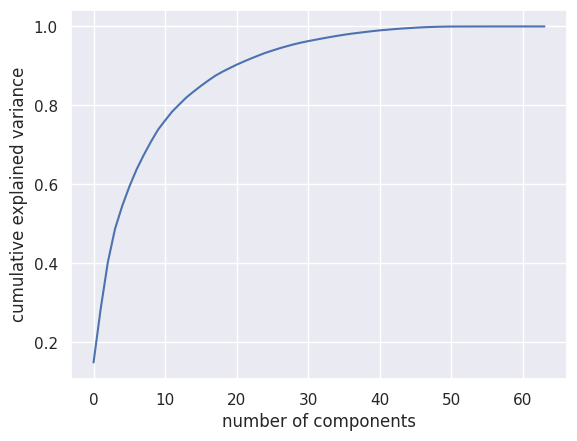

In [12]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Cette courbe quantifie la part de la variance totale, à 64 dimensions, contenue dans les $N$ premières composantes.
Par exemple, nous voyons qu'avec les chiffres, les 10 premières composantes contiennent environ 75 % de la variance, alors qu'il faut environ 50 composantes pour décrire près de 100 % de la variance.

Nous voyons ici que notre projection bidimensionnelle perd beaucoup d'informations (mesurées par la variance expliquée) et qu'il nous faudrait environ 20 composantes pour conserver 90 % de la variance.  L'examen de ce graphique pour un ensemble de données à haute dimension peut vous aider à comprendre le niveau de redondance présent dans de multiples observations.

## L'ACP comme filtrage du bruit

L'ACP peut également être utilisée comme une approche de filtrage des données bruyantes.
L'idée est la suivante : toutes les composantes dont la variance est beaucoup plus grande que l'effet du bruit devraient être relativement peu affectées par le bruit.
Ainsi, si vous reconstruisez les données en utilisant uniquement le plus grand sous-ensemble de composantes principales, vous devriez préférentiellement conserver le signal et éliminer le bruit.

Voyons comment cela se présente avec les données des chiffres.
Tout d'abord, nous allons tracer plusieurs des données d'entrée exemptes de bruit :

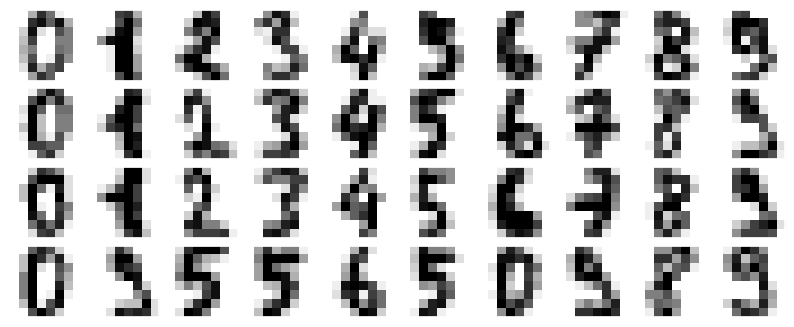

In [13]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

Ajoutons maintenant un peu de bruit aléatoire pour créer un ensemble de données bruitées, et traçons-le à nouveau :

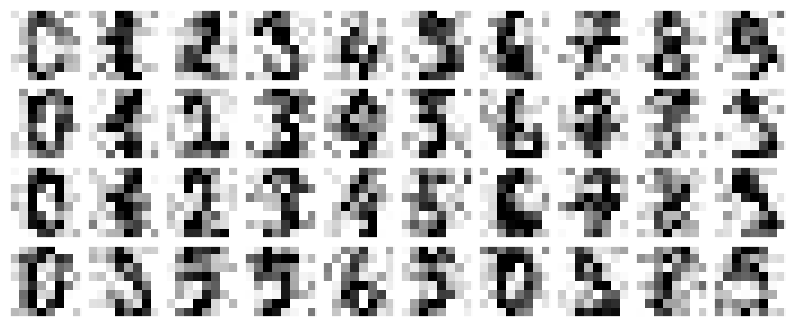

In [14]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

Il est clair à l'œil nu que les images sont bruyantes et contiennent des pixels parasites.
Entraînons une ACP sur les données bruyantes, en demandant que la projection préserve 50% de la variance :

In [15]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

Ici, 50% de la variance correspond à 12 composantes principales.
Nous calculons maintenant ces composantes, puis nous utilisons l'inverse de la transformée pour reconstruire les chiffres filtrés :

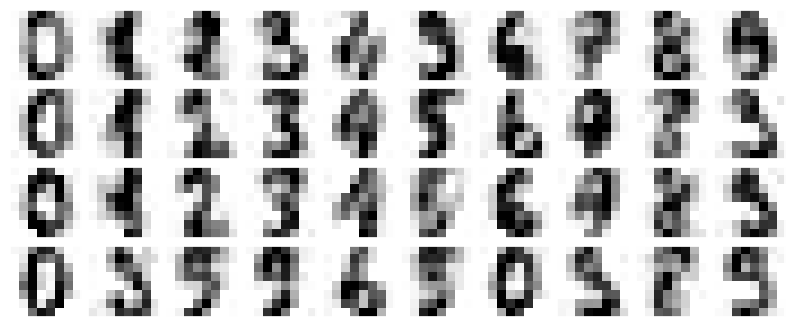

In [16]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

Cette propriété de préservation du signal et de filtrage du bruit fait de l'ACP une routine de sélection des caractéristiques très utile. Par exemple, au lieu de former un classificateur sur des données à très haute dimension, vous pouvez former le classificateur sur la représentation à plus faible dimension, qui servira automatiquement à filtrer le bruit aléatoire des entrées.